<div align="center">
    <h1>Heart Disease</h1>
</div>

<div>
    <h1>Introduction to Artificial Intelligence | Project 2 | Universidad del Valle</h1>
</div>

![Imagen](https://img.webmd.com/dtmcms/live/webmd/consumer_assets/site_images/articles/health_tools/did_you_know_this_could_lead_to_heart_disease_slideshow/493ss_thinkstock_rf_heart_illustration.jpg)

## Authors
- Bryan Steven Biojó     - 1629366
- Julián Andrés Castaño  - 1625743
- Juan Sebastián Saldaña - 1623447
- Juan Pablo Rendón      - 1623049

## Objective
- Apply the concept of Machine Learning (ML) to solve a **classification problem** using the methods seen in the course (supervised learning).

## 1. Importing libraries
As a first step, the libraries used during the development of the problem will be imported:

In [2]:
# Common libraries
import numpy as np
import pandas as pd
import seaborn as sb
import tensorflow as tf
import matplotlib.pyplot as plt
import math
import re
import os
import sys
import warnings
import itertools
warnings.filterwarnings('ignore')
from pandas.api.types import CategoricalDtype
from matplotlib.legend_handler import HandlerLine2D
from IPython.display import SVG, display
from graphviz import Source

# Sklearn libraries
import sklearn
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
#from sklearn.externals.six import StringIO

# Keras libraries
from keras.models import Sequential
from keras.layers.core import Dense

# Disabling TensorFlow warning messages
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'

# Another function that captures warnings
def warn(*args, **kwargs):
    pass

## 2. Loading the dataset
Next, we will load the dataset with the heart diseases which are in a CSV file. Said data was extracted directly from the **Kaggle** website (https://www.kaggle.com/ronitf/heart-disease-uci) and uploaded again to the following **GitHub** repository (https://github.com/bryansbr/heart-disease-AI:

In [3]:
# Heard disease dataset
url = "https://raw.githubusercontent.com/bryansbr/heart-disease-AI/main/heart.csv"
data = pd.read_csv(url)
print(data.columns)
print(data.shape)
data.head()
#data.describe()

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## 3. Data description
In total we have 14 columns with the following information:

- **age:** Age in years.
- **sex:** Where (1 = male; 0 = female).
- **cp:** Chest pain type. Where (1 = angina; 2 = pain without angina; 3 = asymptomatic).
- **trestbps:** Resting blood pressure (in mm/Hg on admission to the hospital).
- **chol:** Serum cholesterol of the person in mg/dl.
- **fbs:** Fasting blood sugar > 120 mg/dl. Where (1 = true; 0 = false).
- **restecg:** Resting electrocardiographic results. Where (0 = normal; 1 = with ST-T wave abnormality (T wave inversions and/or ST elevation or depression > 0.05 mV); 2 = showing probable or definitive left ventricular hypertrophy according to Romhilt criteria-Estes).
- **thalach:** Maximum heart rate achieved.
- **exang:** Exercise induced angina (1 = yes; 0 = no). 
- **oldpeak:** ST depression induced by exercise relative to rest.
- **slope:** The slope of the peak exercise ST segment. Where (0 = ascending slope; 1 = flat; 2 = descending slope).
- **ca:** Number of major vessels (0 - 3) colored by flourosopy.
- **thal:** Blood disorder known as 'Thalassemia'. Where (3 = normal; 6 = fixed defect; 7 = reversable defect).
- **target:** Indicates the probability of suffering from heart disease, according to the information in the preceding columns (1 = yes; 0 = no). This is the column that we want to **predict** with our ML models.

## 4. Types of variables
Now, we will group the variable types into numeric or categorical as appropriate. The **numerical variables** are those statistical variables that give, as a result, a numerical value and these can be discrete or continuous, while the **categorical variables** can take one of a limited number, and usually fixed, of possible values that are base of some qualitative characteristic.

According to the above, the grouping of the variables would be as follows:

|   **Variable**  |   **Type**  |
|-----------------|-------------|
|    **age**      |  numerical  |
|     **sex**     | categorical |
|    **cp**       | categorical |
|   **trestbps**  |  numerical  |
|     **chol**    |  numerical  |
|     **fbs**     | categorical |
|   **restecg**   | categorical |
|   **thalach**   |  numerical  |
|    **exang**    | categorical |
|   **oldpeak**   |  numerical  |
|    **slope**    | categorical |
|     **ca**      | categorical |
|    **thal**     | categorical |
|   **target**    | categorical |


## 5. Grouping of variables according to their type
Before graphing, we must verify that our variables correspond to the type in which they have been classified (numerical or categorical). There must be no missing or null data, as well as strings of characters where numbers must go and vice versa.

### 5.1. Checking for missing or null data
We check for missing or null data in our dataset. If they exist, we must complete or delete them as appropriate.

In [4]:
# We check if there is missing or null data
print("Exists NaN data in the dataset?: ")
print(data.isna().any().any())
print("---------------------------------")
print("Exists null data in the dataset?:")
print(data.isnull().any().any())

Exists NaN data in the dataset?: 
False
---------------------------------
Exists null data in the dataset?:
False


In this case, we see that there is no null or missing data, so we can proceed to make the respective conversions.

### 5.2. Grouping and converting variables
We group the numerical and categorical variables and the target variable.

In [5]:
# Array for numerical variables
numerical_columns = ["age", "trestbps", "chol", "thalach", "oldpeak"]

# Array for categorical variables
categorical_columns = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]

# Target variable
target = "target"

# We convert the corresponding attributes to numerical. In Python, numerical is the default datatype
for columns in numerical_columns:
    data[columns] = pd.to_numeric(data[columns], errors = 'coerce')
    
# Now, we convert the corresponding attributes to categorical.
for columns in categorical_columns:
    cat_type = CategoricalDtype(categories = None, ordered = False)
    data[columns] = data[columns].astype(dtype = cat_type)

## 6. Graphing the variables
According to the previous information, the graphs of the variables are made. The numerical variables will be represented as **histograms**, while the categorical variables as **pie diagrams**.

### 6.1. Numerical variables
- age.
- trestbps.
- chol.
- thalach.
- oldpeak.

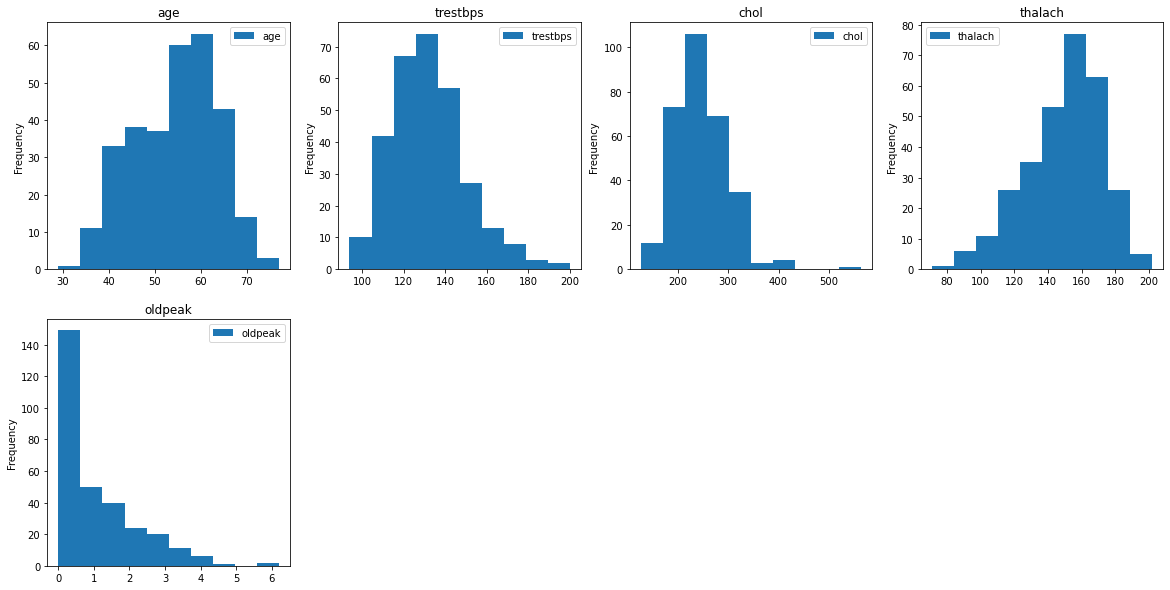

In [6]:
# Figure type object to develop the subplots
fig = plt.figure(figsize = (20, 10))
i = 1

# Graphs of type histogram numerical variables
for num_attrs in numerical_columns:
    ax = fig.add_subplot(2, 4, i)
    data[[num_attrs]].plot(kind = 'hist', ax = ax, rwidth = 1)
    # Kind of switch-case to place the titles in the upper part
    if (i == 1):
        plt.title("age")
    elif (i == 2):
        plt.title("trestbps")
    elif (i == 3):
        plt.title("chol")  
    elif (i == 4):
        plt.title("thalach")
    elif (i == 5):
        plt.title("oldpeak")
    i += 1

 ### 6.2. Categorical variables
- sex.
- cp.
- fbs.
- restecg.
- exang.
- slope.
- ca.
- thal.
- target.

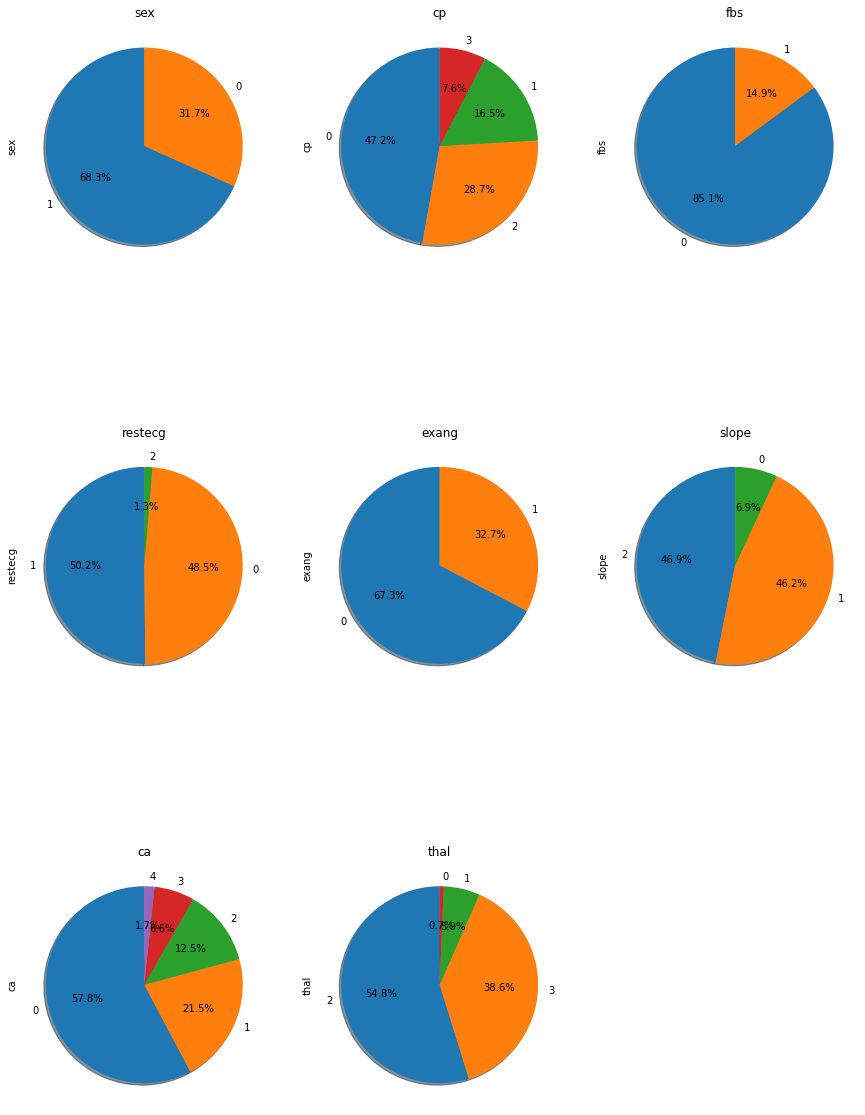

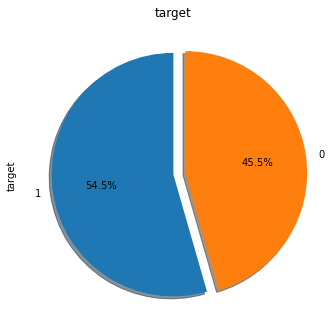

In [7]:
# Figure type object to develop the subplots
fig = plt.figure(figsize = (15, 45))
i = 1

# Graphs of type histogram categorical variables
for cat_attrs in categorical_columns:
    ax = fig.add_subplot(6, 3, i)      
    data[cat_attrs].value_counts().plot(kind = 'pie',
                                        autopct = '%1.1f%%', # Adding percentages
                                        ax = ax, 
                                        startangle = 90, # Start angle 90° (Africa)
                                        fontsize = 10,
                                        shadow = True) # Add shadow
    # Kind of switch-case to place the titles in the upper part
    if (i == 1):
        plt.title("sex")
    elif (i == 2):
        plt.title("cp")
    elif (i == 3):
        plt.title("fbs")  
    elif (i == 4):
        plt.title("restecg")
    elif (i == 5):
        plt.title("exang")
    elif (i == 6):
        plt.title("slope")  
    elif (i == 7):
        plt.title("ca")
    elif (i == 8):
        plt.title("thal")
    i += 1
    
# Graphing the target variable individually 'target'
fig = plt.figure(figsize = (15, 45))
ax = fig.add_subplot(1, 2, 1)
data["target"].value_counts().plot(kind = 'pie',
                                   figsize = (12, 10),
                                   autopct = '%1.1f%%', # Adding percentages
                                   startangle = 90, # Start angle 90° (Africa)
                                   fontsize = 10,
                                   shadow = True, # Add shadow
                                   explode = [0, 0.1])
plt.title("target")

# Show the pie charts
plt.show()

## 7. Preparing the data for classification
There are some methods that do not accept categorical variables as inputs to algorithms. For this reason, we must convert categorical variables to numeric and for this, we will use dummies variables.

In [8]:
# We make a copy of the original dataset
data_copy = data.copy()

# We convert categorical variables to numerical
for cat_attrs in categorical_columns:
    dummies = pd.get_dummies(data_copy[cat_attrs], prefix = cat_attrs)
    data_copy = pd.concat([data_copy.drop(cat_attrs, axis = 1), dummies], axis = 1)

# We display the dataset again with the categorical variables converted to numerical
print(data_copy.columns)
print(data_copy.shape)
data_copy.head()
#data_copy.describe()

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')
(303, 31)


,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


## 8. Generating the training and test datasets
Next, we will divide the data set into two parts: 80% for training and 20% for testing.

In [9]:
# We divide the dataset into two parts
features = data_copy.target.values
tg = data_copy.drop("target", axis = 1)
trainX, testX, trainY, testY = train_test_split(tg, features, test_size = 0.2, stratify = features)

# We print the training and test dataset
print("Number of training tuples:")
print(trainX.shape, trainY.shape)
print("--------------------------")
print("Number of test tuples:")
print(testX.shape, testY.shape)

Number of training tuples:
(242, 30) (242,)
--------------------------
Number of test tuples:
(61, 30) (61,)


# 9. Implementation of the models
With the data separated for training and testing, we will proceed to implement the different models for the prediction of our target variable/column, in this case **target**. The models to implement are: **Decision Tree**, **Naive Bayes** and **Neural Network**.

## Confusion Matrix (*)
A confusion matrix is a tool that allows the visualization of the performance of an algorithm that is used in supervised learning. Each column in the matrix represents the number of predictions for each class, while each row represents the instances in the actual class.

The correct interpretation of the confusion matrix is given below, provided directly from the scikit-learn library (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html):

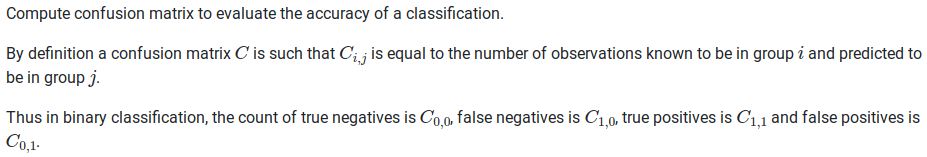

![Imagen](https://static.packt-cdn.com/products/9781838555078/graphics/C13314_06_05.jpg)

We are going to implement a function that allows us to visualize the confusion matrix in a better way.

In [10]:
# Function for visualize the confusion matrix
def plot_confusion_matrix(cm, target_names, title = 'Confusion Matrix', cmap = None, normalize = True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    
    if cmap is None:
        cmap = plt.get_cmap('Purples')
    plt.figure(figsize = (7, 5))
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation = 45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment = "center",
                     color = "white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment = "center",
                     color = "white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Prediction')
    plt.xlabel('Real\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

## 9.1 Decision Tree Model
Technique that allows analyzing sequential decisions based on the use of results and associated probabilities. These can be used to generate expert systems, binary searches, game trees, among others.

![Imagen](https://tierradenumeros.com/publication/201812-epsilon-diagrama-arbol/featured.jpg)

Since the decision tree classification model can become unstable and in certain cases does not guarantee completely reliable results, the **entropy criteria** for the tree will be established and a maximum depth will be assigned.

Score for training:
0.8925619834710744

Confusion Matrix:
[[ 93   9]
 [ 17 123]]
----------------------------------------------------
Score for test:
0.7540983606557377

Confusion Matrix:
[[17  4]
 [11 29]]
----------------------------------------------------
The error percentage is: 18.3614804168164%


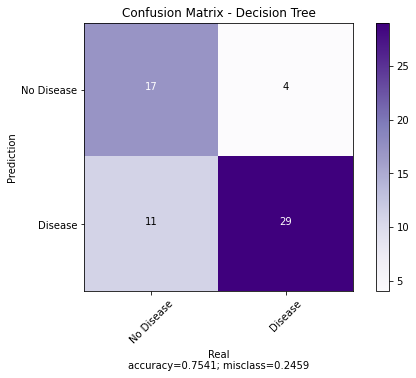

In [41]:
# ===================== DECISION TREE MODEL IMPLEMENTATION ===================== 
max_depthx = 20
min_samples_splitx = 20
model_tree = tree.DecisionTreeClassifier(criterion = "entropy", max_depth = max_depthx, 
                                         min_samples_split = min_samples_splitx, 
                                         random_state = 40)
# Training
dt_model_result = model_tree.fit(trainX, trainY)

# ====================== Training data ======================
#Print the score on the train data
print("Score for training:")
dt_train = dt_model_result.score(trainX, trainY)
print(dt_train)
# Show the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(dt_model_result.predict(trainX), trainY))

print("----------------------------------------------------")

# ======================== Test data ========================
#Print the score on the test data
print("Score for test:")
dt_test = dt_model_result.score(testX, testY)
print(dt_test)
# Show the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(dt_model_result.predict(testX), testY))

print("----------------------------------------------------")

# We calculate the percentage of error between the training dataset and the test dataset
error_percentage = abs((dt_test - dt_train) / (dt_test))
print("The error percentage is: " + str(error_percentage * 100) + "%")

# Second way to visualize the confusion matrix
plot_confusion_matrix(cm = confusion_matrix(dt_model_result.predict(testX), testY), 
                      normalize    = False,
                      target_names = ['No Disease', 'Disease'],
                      title        = "Confusion Matrix - Decision Tree")

### 9.1.1 Visualize the Decision Tree Model
Here we can see the visualization of the model for its respective interpretation:

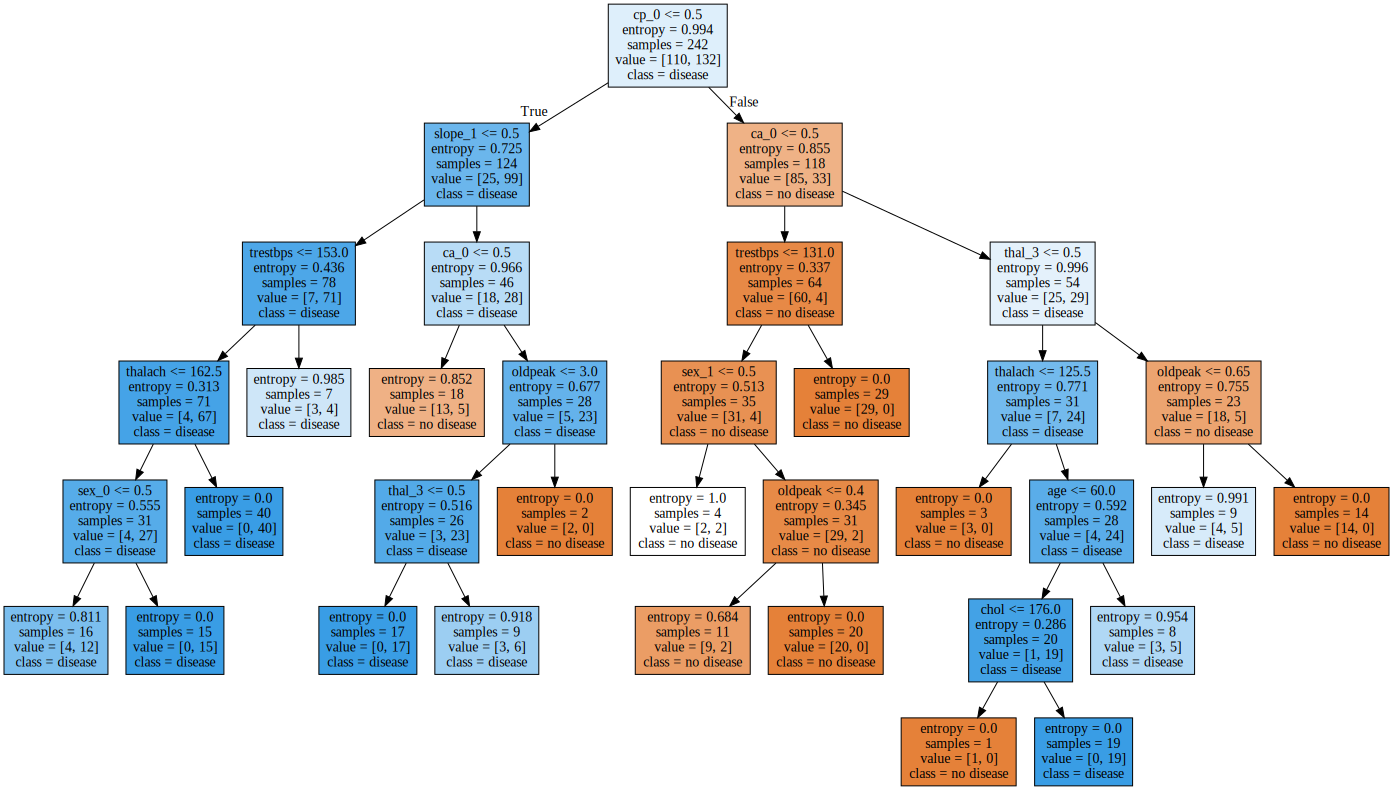

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'sex_0', 'sex_1',
       'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')

In [42]:
# Definition of classes
class_names = ["no disease", "disease"]
features_heart_labels = tg.columns

# Graphing the interpretation of the model
graph = Source(tree.export_graphviz(dt_model_result, out_file = None,
                                    feature_names = features_heart_labels, 
                                    class_names = class_names, filled = True))

# Showing the model
display(SVG(graph.pipe(format = 'svg')))
tg.columns

### 9.1.2. Interpretation of results
The decision tree evaluates each attribute or characteristic of the given data, in such a way that they fulfill a certain value of importance on the target column. The Gini coefficient also comes into play, which determines the degree of "purity" of the attribute based on the number of samples being evaluated in it. For this reason, if its value is zero, it means that the node presents only information of that attribute, otherwise records of other attributes that influence the current node are presented.

Decision trees are easy to implement and interpret if you are clear about the information contained in the data set, it is a very practical model. However, the precision of the data of the trained model at the time of performing the test presents an **error rate of 18.36%**, which, although not excessively high, is always a bit different from the test data.

## 9.2. Naive Bayes Model
A Naive Bayes classifier is a probabilistic classifier based on Bayes' theorem and some additional simplifying hypotheses. This classifier assumes that the presence or absence of a particular characteristic is not related to the presence or absence of any other characteristic, given the variable class.

![Imagen](https://uc-r.github.io/public/images/analytics/naive_bayes/naive_bayes_icon.png)

Score for training:
0.8305785123966942

Confusion Matrix:
[[ 99  30]
 [ 11 102]]
----------------------------------------------------
Score for test:
0.7868852459016393

Confusion Matrix:
[[24  9]
 [ 4 24]]
----------------------------------------------------
The error percentage is: 5.552685950413226%


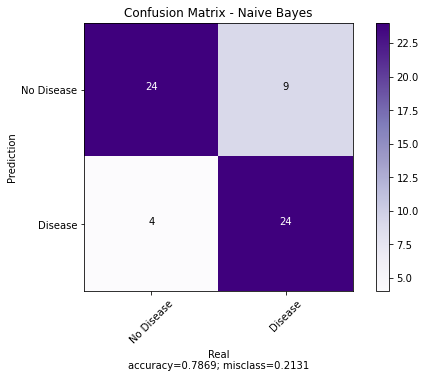

In [43]:
# =====================  NAIVE BAYES MODEL IMPLEMENTATION ===================== 
naive_bayes = GaussianNB()

# Training
nb_model_result = naive_bayes.fit(trainX, trainY)

# ====================== Training data ======================
#Print the score on the train data
print("Score for training:")
nb_train = nb_model_result.score(trainX, trainY)
print(nb_train)
# Show the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(nb_model_result.predict(trainX), trainY))

print("----------------------------------------------------")

# ======================== Test data ========================
#Print the score on the test data
print("Score for test:")
nb_test = nb_model_result.score(testX, testY)
print(nb_test)
# Show the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(nb_model_result.predict(testX), testY))

print("----------------------------------------------------")

# We calculate the percentage of error between the training dataset and the test dataset
error_percentage = abs((nb_test - nb_train) / (nb_test))
print("The error percentage is: " + str(error_percentage * 100) + "%")

# Second way to visualize the confusion matrix
plot_confusion_matrix(cm = confusion_matrix(nb_model_result.predict(testX), testY), 
                      normalize    = False,
                      target_names = ['No Disease', 'Disease'],
                      title        = "Confusion Matrix - Naive Bayes")

### 9.2.1. Interpretation of results
The model is based on establishing the probability of an event, in this case, determining whether a person is disease or not based on the conditions of the rest of the attributes that affect this condition. This model is convenient, since it makes use of the same influence of the data that they have on themselves to determine the probabilities of success and failure for heart disease. The precision of the data of the trained model at the time of performing the test presents an **error rate of 5.55%**, which is quite low.

## 9.3. Neural Network Model
A neural network is a network or circuit of neurons, composed of artificial neurons or nodes. Thus a neural network is either a biological neural network, made up of real biological neurons, or an artificial neural network, for solving artificial intelligence (AI) problems.

![Imagen](https://i.pinimg.com/originals/b0/81/89/b08189699368cf0b71eed9931ee70881.png)

Score for training:
0.9421487603305785

Confusion Matrix:
[[102   6]
 [  8 126]]
----------------------------------------------------
Score for test:
0.8524590163934426

Confusion Matrix:
[[21  2]
 [ 7 31]]
----------------------------------------------------
The error percentage is: 10.521296884933253%


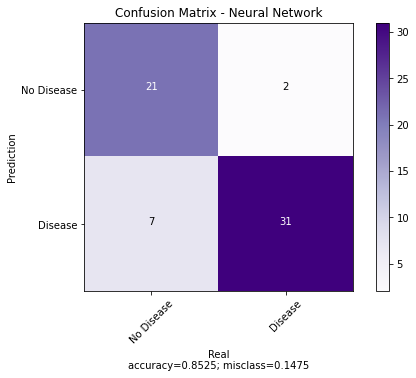

In [44]:
# ===================== NEURAL NETWORK MODEL IMPLEMENTATION =====================

# Neural Network is sensitive to data scale. Therefore, we must normalize
scaler = StandardScaler()  
trainXX = trainX.copy()
testXX = testX.copy()

# We adjust the training dataset
scaler.fit(trainX)  
trainXX = scaler.transform(trainXX)

# We apply the same transformation to the test dataset
testXX = scaler.transform(testXX)  

# Training
nn_model_result = MLPClassifier(solver = 'lbfgs',
                                alpha = 1e-3,
                                activation = 'relu',
                                max_iter = 5000,
                                hidden_layer_sizes = (4, 4, 4, 4),
                                random_state = 50, verbose = True)
nn_model_result.fit(trainXX, trainY)                         

# ====================== Training data ======================
#Print the score on the train data
print("Score for training:")
nn_train = nn_model_result.score(trainXX, trainY)
print(nn_train)
# Show the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(nn_model_result.predict(trainXX), trainY))

print("----------------------------------------------------")

# ======================== Test data ========================
#Print the score on the test data
print("Score for test:")
nn_test = nn_model_result.score(testXX, testY)
print(nn_test)
# Show the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(nn_model_result.predict(testXX), testY))

print("----------------------------------------------------")

# We calculate the percentage of error between the training dataset and the test dataset
error_percentage = abs((nn_test - nn_train) / (nn_test))
print("The error percentage is: " + str(error_percentage * 100) + "%")

# Second way to visualize the confusion matrix
plot_confusion_matrix(cm = confusion_matrix(nn_model_result.predict(testXX), testY), 
                      normalize    = False,
                      target_names = ['No Disease', 'Disease'],
                      title        = "Confusion Matrix - Neural Network")

### 9.3.1. Interpretation of results
Generally, the interpretation of a neural network model is quite complex. First, because the neural network has many attributes that must be changed and that improve and/or worsen the results; and second, they do not offer an easy-to-interpret representation of the process that is carried out internally to obtain results. The precision of the data of the trained model at the time of performing the test presents an **error rate of 10.52%**, which is quite low, although it begins to distance itself a bit.

## 10. Comparison of models
Through a bar graph, we will make a comparison of the three (3) models with both the training data set and the test one.

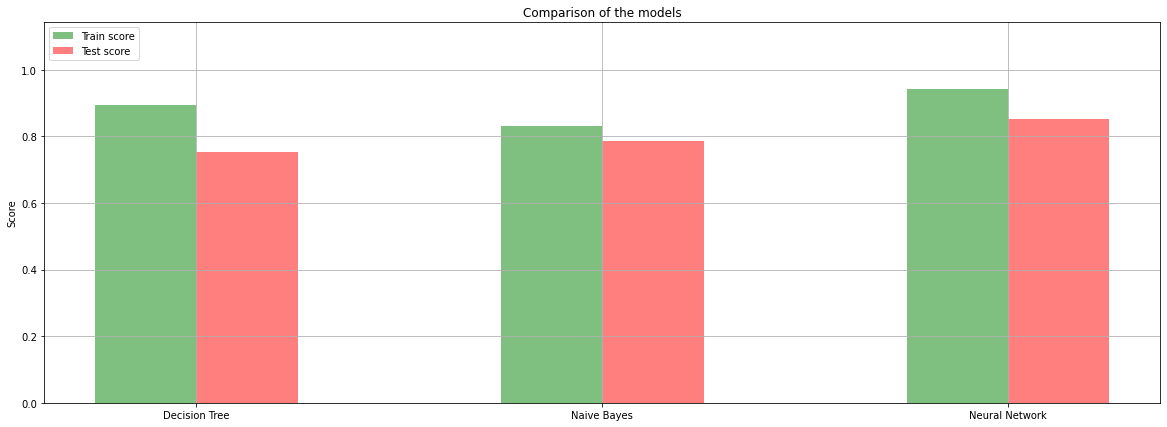

In [54]:
raw_data = {'Model': ['Decision Tree', 'Naive Bayes', 'Neural Network'],
        'Train score': [dt_model_result.score(trainX, trainY), nb_model_result.score(trainX, trainY), nn_model_result.score(trainXX, trainY)],
        'Test score': [dt_model_result.score(testX, testY), nb_model_result.score(testX, testY), nn_model_result.score(testXX, testY)]}

df = pd.DataFrame(raw_data, columns = ['Model', 'Train score', 'Test score'])

# Setting the positions and width for the bars
pos = list(range(len(df['Train score']))) 
width = 0.25 
    
# Plotting the bars
fig, ax = plt.subplots(figsize = (20, 7))

# Create a bar with pre_score data,
plt.bar(pos, 
        df['Train score'], 
        width, 
        alpha = 0.5, 
        color = 'green', 
        label = df['Model'][0]) 

plt.bar([p + width for p in pos], 
        df['Test score'],
        width, 
        alpha = 0.5, 
        color = 'red', 
        label = df['Model'][1]) 

# Set the y axis label
ax.set_ylabel('Score')

# Set the chart's title
ax.set_title('Comparison of the models')

# Set the position of the x ticks
ax.set_xticks([p + 0.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(df['Model'])

# Setting the x-axis and y-axis limits
plt.ylim([0, max(df['Train score'] + 0.2)] )

# Adding the legend and showing the plot
plt.legend(['Train score', 'Test score'], loc = 'upper left')
plt.grid()

# Show the graph
plt.show()

When comparing the scores of the training and testing data set, we can see that they all **exceed 70%**, so we can say that for the heart disease data set, **acceptable/good** results have been obtained when performing the tests predictions.

## 11. Precision of the models
Next, we will observe the precision of the models, which can be seen as the number of hits on the total number of samples of the particular target (disease; no disease):

In [72]:
# ====================================== Accuracy of the models ======================================

# Initial variables
decision_tree = confusion_matrix(dt_model_result.predict(testX), testY)
naive_bayes = confusion_matrix(nb_model_result.predict(testX), testY)
neural_network = confusion_matrix(nn_model_result.predict(testXX), testY)

# Decision Tree
disease_decision_tree = ((decision_tree[1][1] / float(decision_tree[1][1] + decision_tree[0][1])) * 100)
nDisease_decision_tree = ((decision_tree[0][0] / float(decision_tree[0][0] + decision_tree[1][0])) * 100)

# Naive Bayes
disease_naive_bayes = ((naive_bayes[1][1] / float(naive_bayes[1][1] + naive_bayes[0][1])) * 100)
nDisease_naive_bayes = ((naive_bayes[0][0] / float(naive_bayes[0][0] + naive_bayes[1][0])) * 100)

# Neural Network
disease_neural_network =  ((neural_network[1][1] / float(neural_network[1][1] + neural_network[0][1])) * 100)
nDisease_neural_network = ((neural_network[0][0] / float(neural_network[0][0] + neural_network[1][0])) * 100)

# ====================================== Results ======================================
# Decision Tree Model
print("---------------------------------------------------------------------------")
print("For the Decision Tree Model:")
print("\nPercentage of success for disease: " + str(disease_decision_tree) + "%")
print("Percentage of success for no disease: " + str(nDisease_decision_tree) + "%")

# Naive Bayes Model
print("---------------------------------------------------------------------------")
print("For the Naive Bayes Model:")
print("\nPercentage of success for disease: " + str(disease_naive_bayes) + "%")
print("Percentage of success for no disease: " + str(nDisease_naive_bayes) + "%")

# Neural Network Model
print("---------------------------------------------------------------------------")
print("For the Neural Network Model:")
print("\nPercentage of success for disease: " + str(disease_neural_network) + "%")
print("Percentage of success for no disease: " + str(nDisease_neural_network) + "%")

---------------------------------------------------------------------------
For the Decision Tree Model:

Percentage of success for disease: 87.87878787878788%
Percentage of success for no disease: 60.71428571428571%
---------------------------------------------------------------------------
For the Naive Bayes Model:

Percentage of success for disease: 72.72727272727273%
Percentage of success for no disease: 85.71428571428571%
---------------------------------------------------------------------------
For the Neural Network Model:

Percentage of success for disease: 93.93939393939394%
Percentage of success for no disease: 75.0%


|**State** |**Decision Tree**|**Naive Bayes**|**Nueral Netwrok**|
|----------|-----------------|---------------|------------------|
|  Disease |      87.9%      |     72.7%     |       94.0%      |
|No Disease|      60.7%      |     85.7%     |       75.0%      |

## 12. Results
According to the models, the data on the accuracy are the following:
- **Decision Tree:** 0.7541 = 75.41%
- **Naive Bayes:** 0.7869 = 78.7%
- **Neural Network:** 0.8525 = 85.25%

According to items 10 and 11, the following results were obtained for the models:

- The model that has the best success for heart patients is: **Neural Network**.
- The model that has the best success for non-heart patients is: **Naive Bayes**.
- The model that presents the best results is: **Neural Network**.
- The simplest model to implement and interpret is: **Decision Tree**.

### 12.1. Interpretability of the results

When it comes to interpreting results, the most practical model is the **Decision Tree**, because it can be graphically represented and understood the decision-making process; while the **Neural Network** model is the one that presents the best results, although it is more complex to understand and interpret.


## 13. Conclusions
- After all the analysis carried out, we can conclude that the best model to predict heart disease is undoubtedly the **Neural Networks model**. Even so, and as has been emphasized throughout this notebook, the model is quite complex to understand and interpret, so we would use a decision tree model for its ease of implementation and interpretation.
- The **Naive Bayes model** presents some irregularities because, although it provides an easy way to build models given its simplicity, it starts from the assumption that the different characteristics in the data set are independent and for this particular problem the symptoms and other characteristics they are generally associated.
- It is very important to understand the data with which you are going to work. For this heart disease dataset we were lucky that there was no missing or null data and no features had to be added or removed, which would certainly have added more difficulty to the problem.
- It is also important to group the variables into their respective categories (numerical and categorical) before starting to work. In the same way, categorical variables must be converted to numeric for the implementation of some models that do not precisely accept categorical variables.
- There is some variability in the reporting of the precision values of the models, as iterations are made, that is, some models may become better than others. Even so, the one that remains most stable of the three (3) is the **Neural Network model**.
- **No machine learning model will hit 100% probability on a given dataset**. These models must be constantly trained to continue improving them.
- It is possible that there are errors in the interpretation of the results of this notebook, we really do not know. It is the first time that we have faced a problem of this kind.

## 14. References
- https://www.kaggle.com/ronitf/heart-disease-uci
- https://github.com/andcastillo/classification/blob/master/kaggle/kaggle-classification.ipynb
- https://colab.research.google.com/drive/17-ENMkusL5BBWU6FRyQmCq32dj67ftlb?usp=sharing
- https://docs.python.org/3.8/
- https://docs.anaconda.com/
- https://scikit-learn.org/stable/
- https://matplotlib.org/3.3.3/contents.html
- https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052?gi=a394820665ee
- https://towardsdatascience.com/naive-bayes-classifier-81d512f50a7c
- https://www.sciencedirect.com/topics/computer-science/neural-network-model